### O dataset

O problema e conjunto de dados podem ser encontrados [aqui](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware), juntamente com referência para o artigo que usou esse conjunto de dados para gerar a regressão cujas previsões são apresentadas como ultima coluna do dataframe.

O dataset possui atributos de processadores, com um total de 10 variáveis. As colunas 0:1 são não preditivas, 2:7 são preditivas (informações sobre a arquitetura do processador), a coluna 8 apresenta o valor meta, performance relativa do hardware(indicado pelo fabricante), que gostariamos de prever, e a coluna 9 apresenta a predição da coluna 8 por um artigo feito com essa base de dados (iremos descartalas para fazer nossas proprias previsões). Os atributos detalhados são:

```markdown
1. vendor name: 30 
  (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Carregando os dados
df = pd.read_csv('dataset/machine.data',
        names=['vendor', 'model', 'MYCT', 'MMIN', 'MMAX',
               'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])
df

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
# Sumarização das colunas preditivas e coluna alvo
df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']].describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [4]:
conv_dict = {
'MYCT': 'machine cycle time in nanoseconds',
'MMIN': 'minimum main memory in kilobytes',
'MMAX': 'maximum main memory in kilobytes',
'CACH': 'cache memory in kilobytes',
'CHMIN': 'minimum channels in units',
'CHMAX': 'maximum channels in units',
'PRP': 'published relative performance'
}

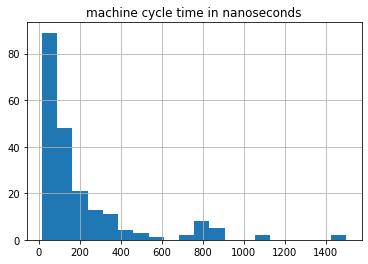

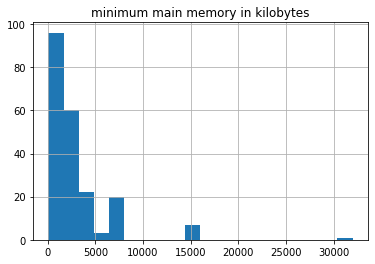

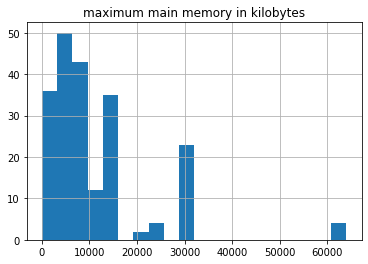

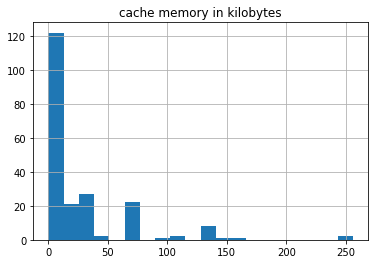

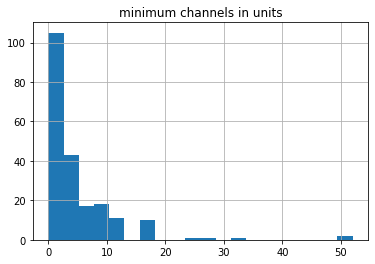

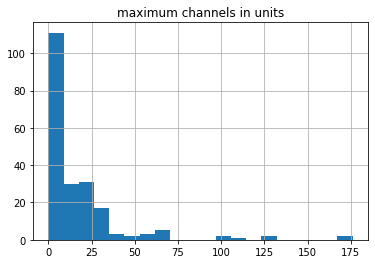

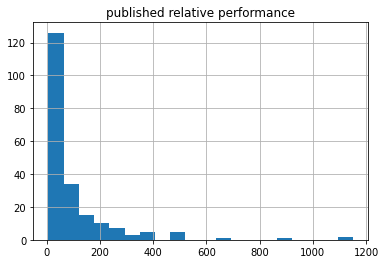

In [5]:
# Distribuição de cada coluna de dados
for col in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']:
    df[col].hist(bins=20)
    plt.title(conv_dict[col])
    plt.show()

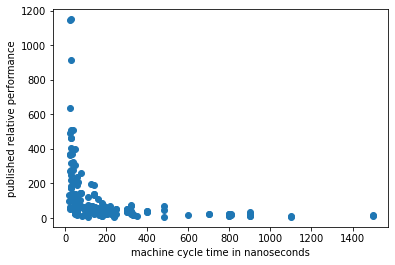

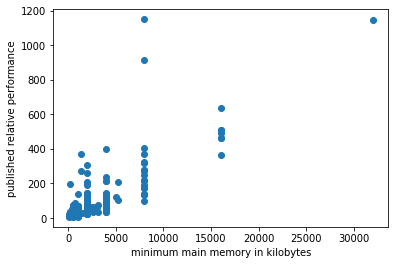

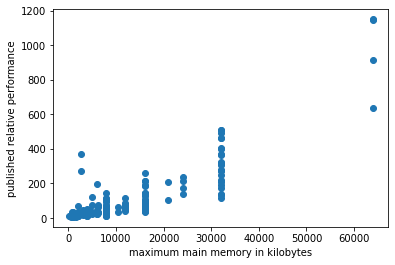

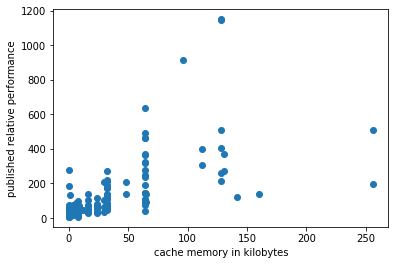

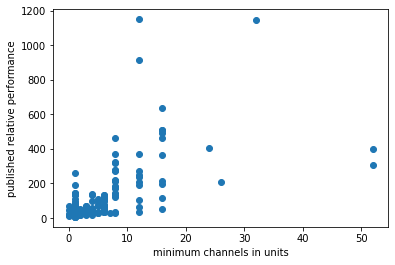

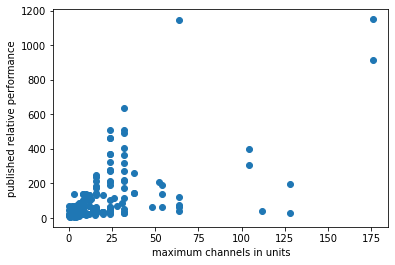

In [6]:
# Plot de cada coluna preditiva pela alvo
for col in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    plt.scatter(df[col], df['PRP'])
    plt.xlabel(conv_dict[col])
    plt.ylabel(conv_dict['PRP'])
    plt.show()

In [8]:
# Correlação de cada coluna com a coluna alvo de previsão
{conv_dict[k]: round(v,3) for k,v in dict(df.corr()['PRP'][:-2]).items()}

{'machine cycle time in nanoseconds': -0.307,
 'minimum main memory in kilobytes': 0.795,
 'maximum main memory in kilobytes': 0.863,
 'cache memory in kilobytes': 0.663,
 'minimum channels in units': 0.609,
 'maximum channels in units': 0.605}